## Python을 이용한 Ammonia chemical equilibrium constant $K_f(T)$ 계산하기

이번 시간에는 python을 이용해 암모니아 합성 반응에 대한 equilibrium constant를 계산하는 시간을 가져보도록 하겠습니다.

질소와 수소를 이용한 암모니아의 합성은 다음과 같은 반응을 통해 이루어집니다.

$$\frac{1}{2}N_2 + \frac{3}{2}H_2 \rightleftharpoons NH_3$$

이 상황에 대해 equilibrium constant를 계산하는 식은 수업시간에 다음과 같이 배웠습니다.

$$K_f = \frac{\prod_j \left(q_{P_j}\right)^{\nu_{P_j}}}{\prod_i \left(q_{R_i}\right)^{\nu_{R_i}}} \times \left( \frac{k_B T}{P^\circ V} \right)^{\sum_j \nu_{P_j} - \sum_i \nu_{R_i}}$$

여기에서 $q_{R_i}$는 반응물 ($N_2$, $H_2$)의 partition function을 의미하는 것이고, $q_{P_j}$는 반응을 통해 만들어진 합성물 ($NH_3$)의 partition function을 의미합니다.

또한 $\nu_{R_i}$와 $\nu_{P_j}$는 반응시 반응물과 화합물의 ratio와 관련된 값들로, 암모니아 합성 반응에서는 각각 $\frac{1}{2}$,  $\frac{3}{2}$,  $1$의 값을 가지게 됩니다.

위의 계산을 직접 해보도록 하겠습니다.

계산을 하기 앞서, $N_2$, $H_2$, $NH_3$ 들을 매번 쓰는 것은 귀찮음이 따르니, 이를 간단하게 다음과 같이 써보겠습니다.



$$\frac{1}{2}A + \frac{3}{2}B \rightleftharpoons C$$

다들 아시겠지만, $A$는 질소, $B$는 수소, $C$는 암모니아를 의미하는 것입니다.

각각의 물질에 대한 partition function은 다음과 같이 쓸 수 있습니다.

$$q_i(V,T) = q_{trans,i}(V,T) \times q_{int,i} (T) =\frac{V}{\Lambda_i (T)^3} \times q_{int,i} (T)$$

$$\left( q_{int,i} (T) = q_{rot,i} (T) \times q_{vib,i} (T) \times q_{elec,i} (T) \right)$$

이 partition function을 이용해서 equilibrium constant 식을 정리하게 되면, 다음과 같은 결과를 얻을 수 있습니다.

$$K_f = \frac{\Lambda_A(T)^{3/2}\Lambda_B(T)^{9/2}}{\Lambda_C(T)^3} \times \frac{P^\circ}{k_B T} \times \frac{q_{int,C}}{(q_{int,A})^{1/2} (q_{int,B})^{3/2}}$$

이제, 이 식을 하나씩 직접 정리를 해서 구해보도록 하겠습니다.

여러분들도 아시겠지만, Python이라는 언어가 최근에 굉장히 유행하고 있는 컴퓨터 언어죠?

Python을 다룰 수 있는 능력은 이후에 excel을 다루는 것처럼 굉장히 당.연.한. 스킬이 될 수도 있습니다.

여러분들도 하나씩 차근히 읽어 보면서 시대에 뒤쳐지지 않는 학생이 되시길... 빌어보면서 최대한 친절하게 설명을 써보겠습니다.

### 첫번째. 코드에 사용할 라이브러리를 호출하기.

Python은 처음부터 계산을 위해 만들어진 언어가 아닙니다.

당연하다고 생각되는 Sin 함수, 자연상수 $e$ 등은 python에 기본 내장되어 있지 않습니다.

이렇게 계산에 자주 사용되는 함수 또는 상수, 더 나아가 자주 사용되는 기능들(외부 csv 파일 데이터 읽어오기, graph 그리기 등등)을 사용하고 싶을 때마다 어떻게 하면 좋을까요?

Python을 지원해주는 다양한 라이브러리를 호출하면 됩니다.

라이브러리에는 이런 기능들이 이미 구현이 되어있고, 저희는 이 라이브러리에 구현된 기능들을 사용하면 됩니다.

이번 계산을 위해 사용하는 라이브러리는 [**numpy**](https://numpy.org/), [**matplotlib**](https://matplotlib.org/), [**pandas**](https://pandas.pydata.org/)로 각각 다음과 같은 기능을 가지고 있는 라이브러리입니다.

- numpy: sin 함수, 자연상수 e, 루트($\sqrt{}$) 등의 기능이 구현되어있다.

- matplotlib: graph를 그리는 기능이 구현되어있다.

- pandas: 외부 *.csv 파일에 적혀있는 내용들을 가지고 온다. 이를 통해 계산의 결과가 잘 맞는지 확인하기 위해 실험 데이터를 코드 내로 가지고 오는 것이 가능하다.

그러면 이제 이 라이브러리를 호출해볼까요?

In [241]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


호출을 하는 방식은 다음과 같습니다.

> "import(호출하다)" + "라이브러리 이름" + "as(~ 로써)" + "별칭(이번 코드를 짤 때 이 라이브러리를 부르는 호칭)"

별칭은 여러분들이 원하시는 이름으로 부르는 것이 가능합니다.

다만, numpy는 np, matplotlib.pyplot를 plt, pandas를 pd로 부르는 것이 규칙 아닌 규칙으로 정해졌습니다.

그 말은 즉슨, 다른 사람들이 대부분 이렇게 호출을 한다는 것을 의미합니다.

다른 사람이 쓴 글을 읽을 때, 그 사람이 혼자서만 더하기를 +가 아닌 - 기호로 쓴다고 하면, 여러분들은 기분이 안좋으시겠죠?

그래서 저도 여기에서 남들이 쓰는 규칙을 따르고 있습니다..

### 두번쨰. 사용할 물리 상수를 정의하기

이번 계산을 할 때, 사용할 물리 상수들이 있습니다.

기준 압력 $P^\circ$, 기체 상수 $R$, 아보가드로 수 $N_{avo}$, 볼츠만 상수 $k_B$, 플랑크 상수 $h$가 그것들입니다.

이런 계산을 하실 때, 여러분들이 가장 조심해야 되는 것은, 단위를 맞추는 일입니다.

미국을 제외한 거의 모든 나라에서는 [**MKS 단위**](https://www.wikiwand.com/en/MKS_system_of_units#:~:text=The%20MKS%20system%20of%20units,redefined%20by%20different%20fundamental%20constants.)를 따르는데요, 저도 여기에서 이 단위를 사용했습니다.

이 뜻은 $kg$, $m$, $s$, $K$, $mol$ 들로 모든 상수의 단위를 표현하겠다는 것을 의미합니다.

물론 편의상 $N$ ($=kg m/s^2$)을 사용하기도 했지만요.

아래에는 사용할 상수들을 Python에서 정의를 한 코드입니다.

In [ ]:

P = 1.01325 * 10**5 # 1 atm [N m**-2]

R = 8.3145 # [J / (K mol) = N m / (K mol) = kg (m/s)**2 / (K mol)]

N_avo = 6.022 * 10**23 # [1/mol]

k_B = 1.38 * 10**-23 # [J/K = N m / K = kg m/s**2 m/K = kg (m/s)**2 / K]

h = 6.626*10**-34   # [m**2 kg/s]


여기에서 "*"은 곱하기 ($\times$)를 의미하며, "**"는 거듭제곱 ($x^a$는 x의 a 제곱이다.)을 의미하고 있습니다.

그리고 # 뒤에 써진 것들은 "주석"으로 실제 코드를 사용할 때는 읽히지 않는 부분인데요. 이 부분에 "[ ]" 괄호 안에 표기한 것은 단위를 표기한 결과입니다.

보시면 알 수 있듯이, 저는 MKS 단위로 모두 변환을 했습니다.

### 세번째. 사용할 함수 선언하기

이번 계산에서 자주 계산되는 값들이 있죠?

이를태면 [**thermal de Broglie wavelength**](https://www.wikiwand.com/en/Thermal_de_Broglie_wavelength) 등을 예로 들 수 있을 것입니다.

이런 값들은 온도, 입자의 무게 등을 바꿔가면서 계산을 해야되는데,, 이를 매번 계산하는 것은 귀찮습니다.

이런 계산을 자동으로 하게 해주는 것이 함수입니다.

Python에서는 함수 선언을 다음과 같이 합니다.

> "def(정의하다)" + "함수명" :
>
>       ... (함수에서 계산하고 싶은 값들...)
>
>
>       "return(이 값을 반환해라)" + "반환값"

어떤 함수들이 선언되었는지, 한번 확인해봅시다.

In [ ]:
def mass(M_r): # molecular weight to mass per particle

    # 분자량(M_r)을 넣어주면, 이 분자 하나 당 질량을 계산해 줍니다.

    return M_r / N_avo * 10**-3 # 단위: [kg]

def Λ(m,T):

    # Thermal de Broglie wavelength를 계산해줍니다.

    # np.sqrt는 square root를 의미합니다.

    return h / np.sqrt(2*np.pi*m*k_B*T) # 단위: [m]



def q_rot_rod(Θ_rot, σ, T):

    # rod 모양의 분자의 rotational partition function을 계산해줍니다.

    # rotational partition function for rod shape molecule: N2, H2
    return 1/σ * T / Θ_rot

def q_rot_top(Θ_rot_1,Θ_rot_2,Θ_rot_3,σ, T):

    # top 모양의 분자의 rotational partition function을 계산해줍니다.

    # rotational partition function for top shape molecule: NH3
    return np.sqrt(np.pi) / σ * (T/ Θ_rot_1)**(1/2) * (T/ Θ_rot_2)**(1/2) * (T/ Θ_rot_3)**(1/2) 

def q_vib(Θ_vib,T):

    # 각 vibrational mode에 대한 partition function을 계산해줍니다.
    # 여기에서 조심해야될 점은 Ammonia의 vibrational mode는 degeneracy를 가졌다는 점입니다. 이 경우 degeneracy 횟수만큼 이를 반복해주셔야 됩니다.

    return 1 / (1 - np.exp(-Θ_vib/T))

def q_elec(D_O, T):

    # 분자의 electrical partition function을 계산해줍니다.

    # D_O : [J / mol]
    # R : [J / (K mol)]
    return np.exp(D_O * (R * T)**-1) # D_O = D_e + \sum_i exp(\theta_vib_i / 2T)


위의 함수들을 한번 꼼꼼히 읽어보세요.(특히 초심자분들..)

이제 계산에 활용될 함수들의 선언이 완료가 되었습니다.

마지막으로 저희가 구해야되는 값, $K_f(T)$를 계산해주는 함수를 선언해주도록 하겠습니다.

위에서 적은 $K_f(T)$의 결과는 다음과 같습니다. 

$$K_f = \frac{\Lambda_A(T)^{3/2}\Lambda_B(T)^{9/2}}{\Lambda_C(T)^3} \times \frac{P^\circ}{k_B T} \times \frac{q_{int,C}}{(q_{int,A})^{1/2} (q_{int,B})^{3/2}}$$

여기에서 $\frac{\Lambda_A(T)^{3/2}\Lambda_B(T)^{9/2}}{\Lambda_C(T)^3} \times \frac{P^\circ}{k_B T} $ 부분을 먼저 계산하고, $\frac{q_{int,C}}{(q_{int,A})^{1/2} (q_{int,B})^{3/2}}$ 부분을 계산을 해 이 둘을 곱하는 방식으로 계산을 진행해봤습니다.

아래 코드를 확인해보세요.

In [265]:
def K_f(T):

    # part 1.

    m_A = 28.014 # Nitrogen (N2)
    m_B = 2.01588 # Hydrogen (H2)
    m_C = 17.031 # Ammonia (NH3)

    # part 1. result

    value_trans = (Λ(mass(m_A),T)**1.5 * Λ(mass(m_B),T)**4.5 * Λ(mass(m_C),T)**-3) * (P / (k_B * T))

    # part 2.

    # internal part 1. Nitrogen

    Θ_rot_A = 2.88
    Θ_vib_A = 3374
    D_O_A = 941.6 * 10**3 # J / mol
    g_e_A = 1
    σ_A = 2

    q_int_A = q_rot_rod(Θ_rot_A, σ_A, T) *  q_vib(Θ_vib_A, T) * g_e_A * q_elec(D_O_A, T)

    # internal part 2. Hydrogen

    Θ_rot_B = 85.3
    Θ_vib_B = 6332
    D_O_B = 432.1 * 10**3 # J / mol
    g_e_B = 1
    σ_B = 2

    q_int_B = q_rot_rod(Θ_rot_B, σ_B, T) *  q_vib(Θ_vib_B, T) * g_e_B * q_elec(D_O_B, T)

    # internal part 3. Ammonia

    Θ_rot_C_1 = 13.6
    Θ_rot_C_2 = 13.6
    Θ_rot_C_3 = 8.92

    Θ_vib_C_1 = 4800
    Θ_vib_C_2 = 1360
    Θ_vib_C_3 = 4880 # with degeneracy 2
    Θ_vib_C_4 = 2330 # with degeneracy 2

    D_O_C = 1158 * 10**3 # J / mol
    σ_C = 3

    q_int_C = q_rot_top(Θ_rot_C_1, Θ_rot_C_2, Θ_rot_C_3, σ_C, T) 
    q_int_C *= q_vib(Θ_vib_C_1, T) * q_vib(Θ_vib_C_2, T) * q_vib(Θ_vib_C_3, T)**2 * q_vib(Θ_vib_C_4,T)**2 
    q_int_C *= q_elec(D_O_C, T)


    # part 2. result

    value_internal = q_int_A**-0.5 * q_int_B**-1.5 * q_int_C 

    # final value

    return value_trans * value_internal

### 네번째. 실험값과 비교해보기

이렇게 구한 결과와 실험 결과를 한번 비교 확인해보도록 하겠습니다.

실험 결과는 [**JANAF Thermochemical Tables, 1982**](https://srd.nist.gov/jpcrdreprint/1.555666.pdf)에 나와있는 결과로, 857 페이지 (pdf상으로 164 페이지)에서 결과를 확인하실 수 있습니다.

이 결과를 저는 csv 파일로 저장을 했습니다.

이 결과는 다음과 같은 명령어로 불러올 수 있습니다.

In [256]:
experiment_data = pd.read_csv("./Equilibrium_constant_for_Ammonia_data_nist.csv")

experiment_data

,Temperature (K),log10(K_p)
0,100,17.7620
1,200,6.7112
2,300,2.8240
3,400,0.7010
4,500,-0.4960
5,600,-1.3770
6,700,-2.0230
7,800,-2.5130
8,900,-2.9100
9,1000,-3.2200


보시면 알 수 있듯이, $K_f(T)$ 결과를 직접 쓰지 않고, $\log_{10} K_f(T)$ 으로 변환해서 썼습니다.

이는 이 $K_f(T) 값이 지나치게 작거나, 또는 크기 때문에 그런데요.

로그를 취해주면 매우 큰 값 ($10^{17.7620}$)은 작은 수 ($17.7620$)로, 매우 작은 값 ($10^{17.7620}$)은 적당히 작은 수 ($17.7620$)로 표현이 가능해집니다.

이제 결과를 비교해봅시다.

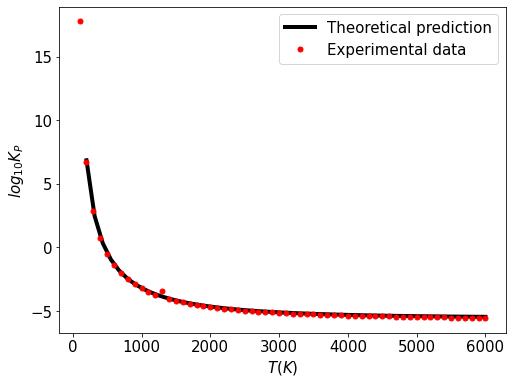

In [262]:
# 이론으로 계산한 결과를 온도 200 K에서 6000 K 까지 확인해봅시다.

T_array = np.linspace(200, 6000)
value_array = K_f(T_array) # 이론 계산이 200 K에서 6000 K 까지 완료가 됩니다..!


# 둘의 결과를 그래프로 확인해봅시다.

plt.figure(figsize = (8,6))
plt.plot(T_array, np.log10(value_array), 'k', label = "Theoretical prediction", lw = 4)
plt.plot(experiment_data['Temperature (K)'], experiment_data['log10(K_p)'], 'ro', markersize = 5, label = "Experimental data")
plt.xlabel(r"$T (K)$",fontsize = 15)
plt.ylabel(r"$log_{10}K_P$",fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [271]:
# plt.figure(figsize = (8,6))
# plt.loglog(10**3 / T_array, np.log10(value_array) + 6, 'k', label = "Theoretical prediction", lw = 4)
# plt.loglog(10**3 / experiment_data['Temperature (K)'], experiment_data['log10(K_p)'] + 6, 'ro', markersize = 2, label = "Experimental data")
# plt.xlabel(r"$10^3 / T (K)$",fontsize = 15)
# plt.ylabel(r"$log_{10}K_P$",fontsize = 15)
# plt.xticks(fontsize = 15)
# plt.yticks(fontsize = 15)
# plt.legend(fontsize = 15)
# plt.show()